## Import Library

In [ ]:
import pandas as pd #Pengolahan dataframe
import numpy as np #Perhitungan matematika
import matplotlib.pyplot as plt #Visualisasi
import seaborn as sns #Visualisasi
from sklearn.preprocessing import MinMaxScaler #Library untuk normalisasi
from sklearn.metrics import silhouette_score #Library untuk evaluasi model
from sklearn.cluster import KMeans # Import kmeans library untuk menentukan elbow method

## Load Data

In [ ]:
df = pd.read_csv("Dataset/kendaraan_test.csv")
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df2 = pd.read_csv("Dataset/kendaraan_train.csv")
df2 = df2.drop(columns=["id"])
df2

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
df = pd.concat([df,df2])
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Eksplorasi dan Persiapan Data

In [ ]:
df.shape

(333470, 11)

In [ ]:
df.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
# Statistik dataset
df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551
std,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# Cleaning data
# Mengecek nilai null
df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Data yang masih kosong ada sekian banyak

In [ ]:
# Menghapus baris yang memiliki nilai null
df = df.dropna()
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Data yang kosong sudah tidak ada, sudah dibersihkan semua

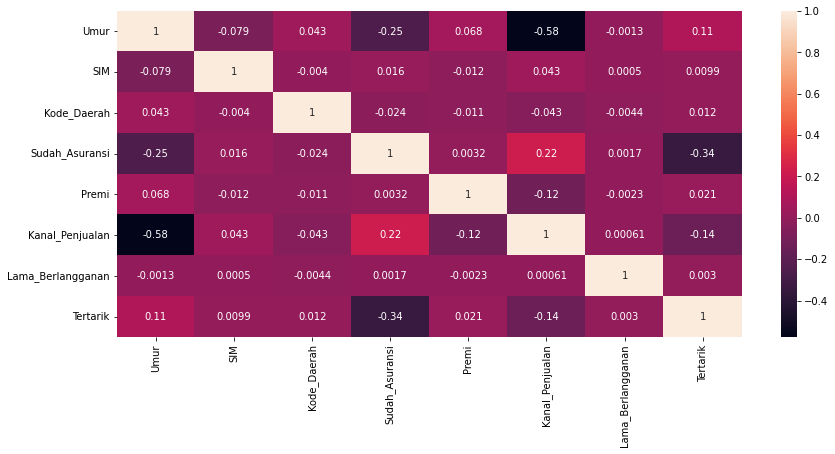

In [ ]:
# Menampilkan korelasi antar feature
corr = df.corr()
plt.subplots(figsize=(14,6))
sns.heatmap(corr,annot=True)

Berdasarkan dari korelasi diatas, terlihat salah satu fitur yang memiliki korelasi yang tinggi adalah antara umur dan premi. Dan akan dilakukan percobaan antara 2 fitur yang memiliki korelasi yang kurang baik salah satunya adalah umur dan lama berlangganan.

In [ ]:
# Menentukan fitur
df = df.loc[:, ("Umur", "Premi", "Lama_Berlangganan")]
df

,Umur,Premi,Lama_Berlangganan
0,49.0,46963.0,145.0
1,22.0,39624.0,241.0
2,24.0,110479.0,62.0
3,46.0,36266.0,34.0
4,35.0,26963.0,229.0
...,...,...,...
285826,23.0,25988.0,217.0
285827,21.0,44686.0,50.0
285828,23.0,49751.0,226.0
285829,68.0,30503.0,270.0


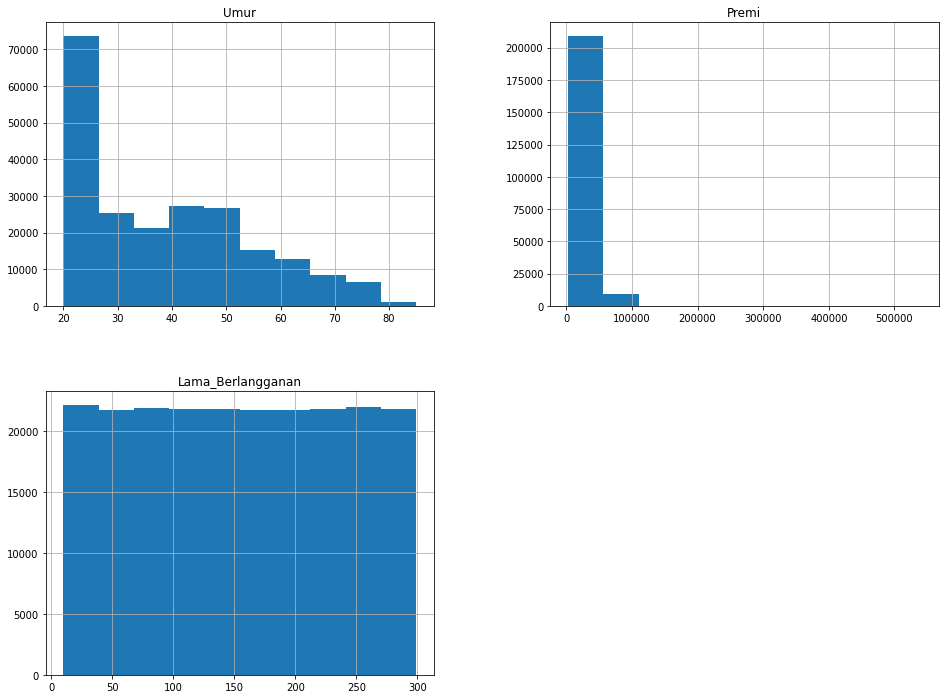

In [ ]:
# Mengecek distribusi dari setiap fitur yang dipakai
df.hist(layout=(2,2), figsize=(16,12))
plt.show()

Untuk melihat data-datanya

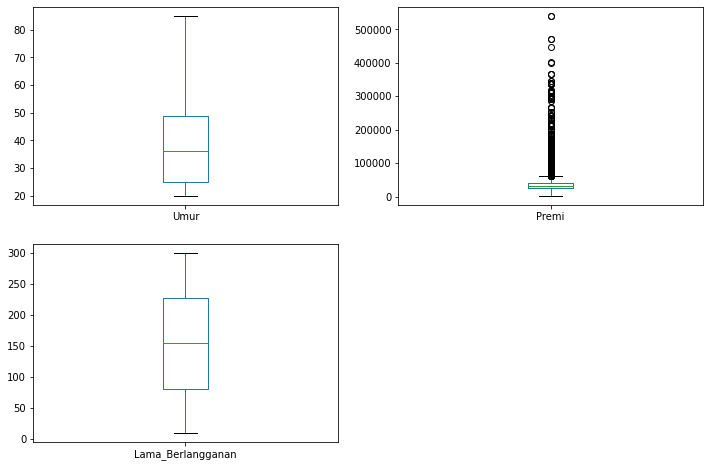

In [ ]:
df.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,8))
plt.show()

Garis kecil dibagian ujung : Outliner

In [ ]:
# Melakukan Normalisasi
# Data diperkecil agar lebih mudah dilihat
scaler = MinMaxScaler()
hasil = scaler.fit_transform(df)
df.loc[:, [column for column in df.columns]] = hasil
df

,Umur,Premi,Lama_Berlangganan
0,0.446154,0.082475,0.467128
1,0.030769,0.068822,0.799308
2,0.061538,0.200636,0.179931
3,0.400000,0.062575,0.083045
4,0.230769,0.045268,0.757785
...,...,...,...
285826,0.046154,0.043454,0.716263
285827,0.015385,0.078239,0.138408
285828,0.046154,0.087661,0.747405
285829,0.738462,0.051853,0.899654


### Membuat Class K-Means

In [ ]:
def euclidean_distance (x1,x2) : 
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
class KMeans_scratch : 
    def __init__(self, K=2, maks_iteration=150): 
        self.K = K
        self.maks_iteration = maks_iteration
        self.centroids = []
        self.clusters = [[] for i in range(self.K)]
  
    def predict(self, X) : 
        self.X = X
        self.baris , self.column = X.shape

        # Generate random centroid 
        centroid_indexes = np.random.choice(self.baris,self.K,replace=False)
        for index in centroid_indexes : 
            self.centroids.append(self.X[index])

        # Iteration sebanyak maks iteration atau centroid tidak berubah posisi
        for i in range(self.maks_iteration) : 

            # Menentukan clusters / centroid terdekat dari setiap titik
            clusters = [[] for i in range(self.K)]
            for idx, row in enumerate(self.X) : 
                # Mencari centroid terdekat dengan membandingkan jarak setiap centroid dan mencari jarak terpendek
                closest_centroids_index = self.select_nearest_centroid(row)
                clusters[closest_centroids_index].append(idx)
                
            self.clusters = clusters

            # Update centroid
            old_centroids = self.centroids
            self.centroids = self.generate_new_centroids()

            # Cek centroid berubah atau tidak
            isChange = False
            for i,old_centroid in enumerate(old_centroids) : 
                # Menghitung jarak old centroid ke new centroid
                distance = euclidean_distance(old_centroid, self.centroids[i])
                if (distance != 0) :
                    isChange = True
            if (isChange == False) : 
                break

        # Menentukan label dari hasil klusterisasi
        labels = self.generate_labels()
        return labels

    def select_nearest_centroid(self, row) : 
        distance_to_all_centroids = [euclidean_distance(row,centroid) for centroid in self.centroids]
        return np.argmin(distance_to_all_centroids)

    def generate_new_centroids(self) : 
        centroids = np.zeros((self.K, self.column))
        for cluster_idx, cluster in enumerate(self.clusters) : 
            new_centroids = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = new_centroids
        return centroids

    def generate_labels(self) : 
        labels = np.empty(self.baris)
        for cluster_idx, cluster in enumerate(self.clusters):
            for row in cluster:
                labels[row] = cluster_idx
        return labels

### Eksperimen 1
Eksperimen menggunakan fitur Umur dan Premi

In [ ]:
df1 = df.loc[:, ("Umur", "Premi")]
df1.head()

,Umur,Premi
0,0.446154,0.082475
1,0.030769,0.068822
2,0.061538,0.200636
3,0.400000,0.062575
4,0.230769,0.045268


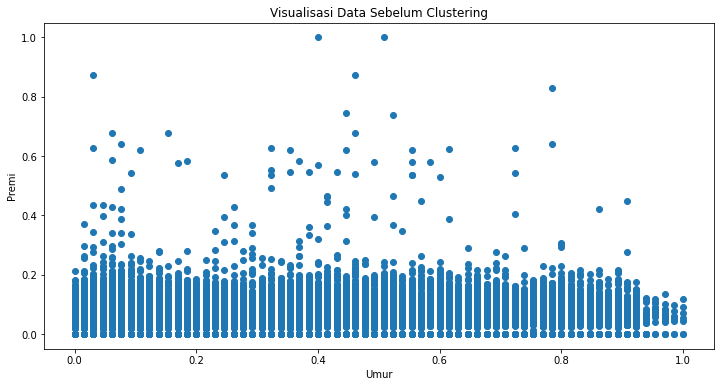

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df1.iloc[:,0] , df1.iloc[:,1] )
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
plt.title("Visualisasi Data Sebelum Clustering")
plt.show()

#### Menentukan nilai k terbaik

In [ ]:
X1 = df1.to_numpy()
X1.shape

(218707, 2)

In [ ]:
k_range = range(1,10)
sse = []
for i in k_range : 
    km = KMeans(n_clusters=i)
    km.fit(X1)
    sse.append(km.inertia_)
sse

[12716.203204407726,
 3511.2704976987948,
 1484.0204448025252,
 958.797450379071,
 712.888212724969,
 567.6457749731304,
 480.3706871140682,
 423.99522461591965,
 382.2519496954006]

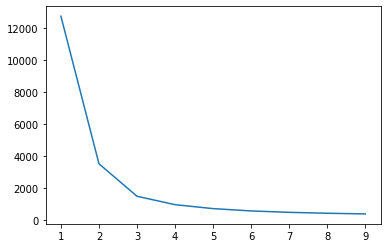

In [ ]:
plt.figure()
plt.plot(k_range,sse)

 Dapat dilihat diatas bahwa nilai k terbaik sesuai dengan elbow method adalah 3

#### Clustering Process

In [ ]:
model = KMeans_scratch(K=3,maks_iteration=10)
y1_pred = model.predict(X1)

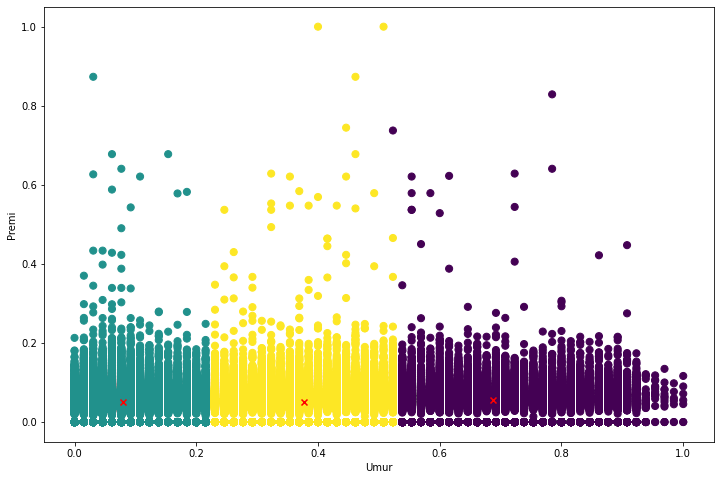

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X1[:, 0], X1[:, 1], c=y1_pred, s=50)

centroid = model.centroids
plt.scatter(centroid[:, 0], centroid[:, 1], c='red',marker="x", linewidths=2)
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])
plt.show()

### Eksperimen 2
Menggunakan fitur Umur dan Lama Berlangganan

In [ ]:
df2 = df.loc[:, ("Umur", "Lama_Berlangganan")]
df2.head()

,Umur,Lama_Berlangganan
0,0.446154,0.467128
1,0.030769,0.799308
2,0.061538,0.179931
3,0.400000,0.083045
4,0.230769,0.757785


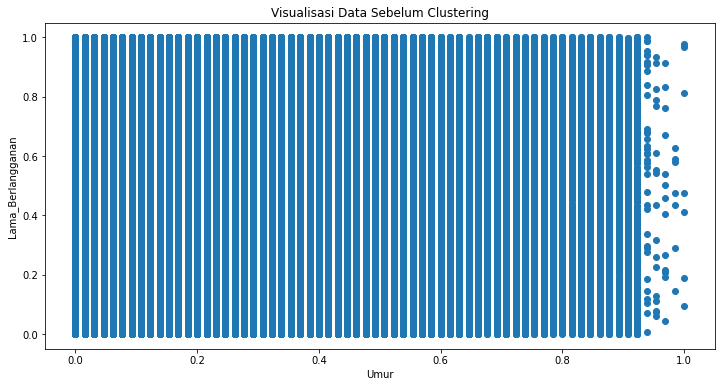

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df2.iloc[:,0] , df2.iloc[:,1] )
ax.set_xlabel(df2.columns[0])
ax.set_ylabel(df2.columns[1])
plt.title("Visualisasi Data Sebelum Clustering")
plt.show()

#### Menentukan nilai k terbaik

In [ ]:
X2 = df2.to_numpy()
X2.shape

(218707, 2)

In [ ]:
k_range = range(1,10)
sse = []
for i in k_range : 
    km = KMeans(n_clusters=i)
    km.fit(X2)
    sse.append(km.inertia_)
sse

[30888.464731148793,
 17084.20359819237,
 11386.340821396208,
 7880.60512469968,
 6272.275166351515,
 5299.216922507984,
 4399.2818984277865,
 3643.8441850377926,
 3183.8757084785143]

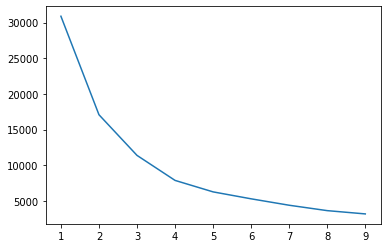

In [ ]:
plt.figure()
plt.plot(k_range,sse)

Dapat dilihat diatas bahwa nilai k terbaik sesuai dengan elbow method adalah 4

#### Clustering Process

In [ ]:
model = KMeans_scratch(K=4,maks_iteration=10)
y2_pred = model.predict(X2)

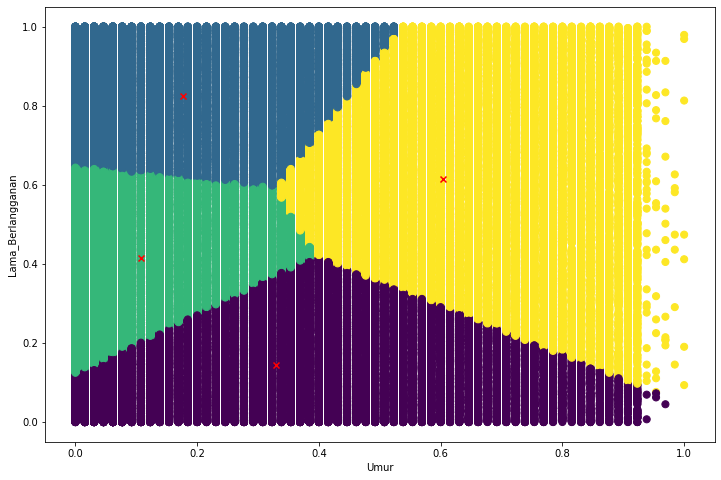

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X2[:, 0], X2[:, 1], c=y2_pred, s=50)

centroid = model.centroids
plt.scatter(centroid[:, 0], centroid[:, 1], c='red',marker="x", linewidths=2)
plt.xlabel(df2.columns[0])
plt.ylabel(df2.columns[1])
plt.show()

## Evaluasi

In [ ]:
score_df1 = silhouette_score(X1,y1_pred)
score_df2 = silhouette_score(X2,y2_pred)

In [ ]:
print("score eksperimen 1 : " + str(score_df1))
print("score eksperimen 2 : " + str(score_df2))

score eksperimen 1 : 0.6221765623482106
score eksperimen 2 : 0.35039496939771664
